# Bellabeat - fitbit analysis using R

![](https://img.bazzar.hr/dEF84QQ/fn:logotype-01/czM6Ly9kYXRhc3Rv/cmUuYmF6emFyLmhy/L1hZakxBSzJzNm9N/VmtiYWZNdVN2ejlQ/eg)

## Table of contents

- overview of the case study
- company summary
- business tasks
    
    1.problem statement
    
    2.key stackholder
    
- Data integrity

- Data manipulation
   
    1.Processing and cleaning steps
    
    2.Datatypes and transformations

- Analysis and Insights
    
    1.Exploration of the smart device usage data
    
    2.trends and pattern in consumer behavior
    
- conclusion 
    
    1.summary of key finding and implications 
    
    2.future opportunities and next steps

## overview of the case study

Overview of the Case Study:

The case study revolves around Bellabeat, a high-tech manufacturer of health-focused products for women. As a junior data analyst, you are tasked with analyzing smart device usage data to gain insights into how consumers use non-Bellabeat smart devices. The objective is to apply these insights to one of Bellabeat's products and make high-level recommendations for the company's marketing strategy.

The case study follows the data analysis process, including asking relevant questions, preparing and processing the data, analyzing the data, sharing insights, and providing actionable recommendations. By the end of the case study, you will develop a portfolio-ready analysis report showcasing your knowledge and skills as a data analyst.

Throughout the case study, you will encounter key stakeholders such as Urška Sršen (Bellabeat's co-founder and Chief Creative Officer), Sando Mur (Bellabeat's co-founder), the Bellabeat marketing analytics team, and other characters involved in the company's operations.

The case study is divided into sections that cover various aspects of the data analysis process, including data integrity, data manipulation documentation, analysis, visualizations, and insights, as well as recommendations for Bellabeat's marketing strategy.

The ultimate goal is to provide valuable insights into smart device usage trends, their relevance to Bellabeat's customers, and how these trends can inform and influence the company's marketing strategies.

## company summary


Bellabeat is a high-tech manufacturer of health-focused products for women, founded in 2013. Their flagship product is the Bellabeat app, which offers features such as activity tracking, sleep monitoring, stress management, and menstrual cycle tracking. The app connects with Bellabeat's wearable devices, including the versatile Leaf tracker and the Time wellness watch. Bellabeat also offers the Spring water bottle for hydration tracking and a membership program for personalized guidance. With a mission to empower women through technology and data-driven insights, Bellabeat has established itself as a leading brand in the wellness industry.


## Business tasks

- Analyze smart device usage data: The primary task is to analyze smart device usage data to gain insights into how consumers use non-Bellabeat smart devices. This analysis will provide valuable information on consumer behavior and trends.

- Apply insights to Bellabeat customers: The goal is to apply the insights gained from the analysis to understand how Bellabeat customers use their smart devices. This will help identify patterns and preferences specific to Bellabeat's target audience.

- Influence Bellabeat marketing strategy: The insights and trends uncovered from the analysis will be used to inform and influence Bellabeat's marketing strategy. This will involve leveraging the findings to develop targeted marketing campaigns and product enhancements to better cater to customer needs and preferences.

- Present analysis and recommendations: The final task is to prepare a comprehensive report and presentation summarizing the analysis, key findings, and high-level recommendations. This will involve communicating the insights effectively to the Bellabeat executive team, ensuring they are actionable and can drive informed decision-making.

- problem statement
  
  Bellabeat, a high-tech manufacturer of health-focused products for women, aims to become a larger player in the global smart device market. To achieve this, they need to gain insights into how consumers are using smart devices and how these trends can inform their marketing strategy. The challenge is to analyze smart device usage data and identify key trends that can drive business decisions and help Bellabeat reach its growth goals.
  
  
- Key Stakeholders


- **Urska Srsen**: Bellabeat’s cofounder and Chief Creative Officer
- **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- **Bellabeat marketing analytics team**. 






**Data Selection**

- Daily Activity Data: This dataset provides information about users' daily physical activity, which can help understand their activity patterns and behaviors.

- Daily Calories Data: This dataset includes data on users' daily calorie consumption, which can provide insights into their dietary habits and calorie intake.

- Daily Intensity Data: This dataset contains information about the intensity levels of users' daily activities, which can be valuable for understanding their activity preferences and engagement.

- Daily Steps Data: This dataset tracks users' daily step counts, offering insights into their overall physical activity levels and trends.

- Heart Rate Data: This dataset records users' heart rate data, which can provide information about their cardiovascular health and exercise intensity.

- Sleep Data: This dataset captures users' sleep patterns and duration, which can be analyzed to understand their sleep quality and habits.


In [13]:
# loading packages

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
#Importing the data
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories<- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heart_rate <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


### Data cleaning

- check the data for duplicates, missing values,null values

In [3]:
# Checking distinct values, missing values, null values, and duplicates
message("Checking for number of distinct ID:")
n_distinct(activity$Id)
n_distinct(heart_rate$Id)
n_distinct(steps$Id)
n_distinct(sleep$Id)
n_distinct(calories$Id)

message("Checking for missing values:")
sum(is.na(activity)) 
sum(is.na(heart_rate))
sum(is.na(steps))
sum(is.na(sleep))
sum(is.na(calories))

message("Checking for null values:")
sum(is.null(activity)) 
sum(is.null(heart_rate))
sum(is.null(steps))
sum(is.null(sleep))
sum(is.null(calories))

message("Checking for duplicated rows:")
sum(duplicated(activity))
sum(duplicated(heart_rate))
sum(duplicated(steps))
sum(duplicated(sleep))
sum(duplicated(calories))

Checking for number of distinct ID:



[1] 33

[1] 14

[1] 33

[1] 24

[1] 33

Checking for missing values:



[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

Checking for null values:



[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

Checking for duplicated rows:



[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

In [9]:
# removing duplicate values
sleep <- distinct(sleep)
sum(duplicated(sleep))

[1] 0

In [11]:
# removing duplicate and null values

activity <- activity %>% 
    distinct() %>%
    drop_na()

steps <- steps %>%
    distinct() %>%
    drop_na()

### clean and rename column

In [16]:
clean_names(activity)
activity <- rename_with(activity,tolower)

clean_names(sleep)
sleep <- rename_with(sleep,tolower)

clean_names(steps)
steps <- rename_with(steps,tolower)

clean_names(calories)
calories <- rename_with(calories,tolower)

id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_day,step_total
<dbl>,<chr>,<int>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705
1503960366,4/18/2016,13019
1503960366,4/19/2016,15506
1503960366,4/20/2016,10544


id,activity_day,calories
<dbl>,<chr>,<int>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728
1503960366,4/18/2016,1921
1503960366,4/19/2016,2035
1503960366,4/20/2016,1786


### summary for the datesets

In [17]:
library(skimr)

In [18]:
# activity  summary

skim(activity)

# sleep summary

skim(sleep)

# steps summary
skim(steps)

# calories summary

skim(calories)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,activitydate,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09,▇▅▃▅▅
3,numeric,totalsteps,0,1,NA,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04,▇▇▁▁▁
4,numeric,totaldistance,0,1,NA,NA,NA,NA,NA,5.489702e+00,3.924606e+00,0,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01,▇▆▁▁▁
5,numeric,trackerdistance,0,1,NA,NA,NA,NA,NA,5.475351e+00,3.907276e+00,0,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01,▇▆▁▁▁
6,numeric,loggedactivitiesdistance,0,1,NA,NA,NA,NA,NA,1.081709e-01,6.198965e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00,▇▁▁▁▁
7,numeric,veryactivedistance,0,1,NA,NA,NA,NA,NA,1.502681e+00,2.658941e+00,0,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01,▇▁▁▁▁
8,numeric,moderatelyactivedistance,0,1,NA,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00,▇▁▁▁▁
9,numeric,lightactivedistance,0,1,NA,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01,▆▇▆▁▁


── Data Summary ────────────────────────
                           Values  
Name                       activity
Number of rows             940     
Number of columns          15      
_______________________            
Column type frequency:             
  character                1       
  numeric                  14      
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 activitydate          0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 id                               0             1 4.86e+9 2.42e+9 1503960366
 2 totalsteps                       0             1 7.64e+3 5.09e+3          0
 3 totaldistance                    0             

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,sleepday,0,1,20,21,0,31,0,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,id,0,1,NA,NA,NA,NA,NA,4.994963e+09,2.060863e+09,1503960366,3.977334e+09,4702921684.0,6962181067,8792009665,▆▆▇▅▃
3,numeric,totalsleeprecords,0,1,NA,NA,NA,NA,NA,1.119512e+00,3.466356e-01,1,1.000000e+00,1.0,1,3,▇▁▁▁▁
4,numeric,totalminutesasleep,0,1,NA,NA,NA,NA,NA,4.191732e+02,1.186359e+02,58,3.610000e+02,432.5,490,796,▁▂▇▃▁
5,numeric,totaltimeinbed,0,1,NA,NA,NA,NA,NA,4.584829e+02,1.274551e+02,61,4.037500e+02,463.0,526,961,▁▃▇▁▁


── Data Summary ────────────────────────
                           Values
Name                       sleep 
Number of rows             410   
Number of columns          5     
_______________________          
Column type frequency:           
  character                1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 sleepday              0             1  20  21     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 id                         0             1 4994963041.   2.06e+9 1503960366
2 totalsleeprecords          0             1          1.12 3.47e-1          1
3 totalminutesasleep         0             1        419.   1.19e+2       

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,activityday,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4445114986.0,6962181067,8877689391,▇▅▃▅▅
3,numeric,steptotal,0,1,NA,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7405.5,10727,36019,▇▇▁▁▁


── Data Summary ────────────────────────
                           Values
Name                       steps 
Number of rows             940   
Number of columns          3     
_______________________          
Column type frequency:           
  character                1     
  numeric                  2     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 activityday           0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 id                    0             1 4855407369. 2424805476. 1503960366
2 steptotal             0             1       7638.       5087.          0
          p25         p50        p75       p100 hist 
1 2320127002  4445114986  69

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,activityday,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2320127002.0,4445114986,6.962181e+09,8877689391,▇▅▃▅▅
3,numeric,calories,0,1,NA,NA,NA,NA,NA,2.303610e+03,7.181669e+02,0,1828.5,2134,2.793250e+03,4900,▁▆▇▃▁


── Data Summary ────────────────────────
                           Values  
Name                       calories
Number of rows             940     
Number of columns          3       
_______________________            
Column type frequency:             
  character                1       
  numeric                  2       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 activityday           0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 id                    0             1 4855407369. 2424805476. 1503960366
2 calories              0             1       2304.        718.          0
          p25        p50         p75       p100 hist 
1 232012

In [29]:

head(activity)
head(sleep)
head(calories)
head(steps)

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,id,activityday,calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,id,activityday,steptotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


In [32]:
# formaitting
sleep <- sleep %>% 
  rename(date= sleepday) %>% 
  mutate(date = as_date(date,format = "%m/%d/%Y %H:%M:%S %p"))

view(sleep)
head(sleep)



steps <- steps %>% rename(date_time = activityday)%>%
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

view(steps)
head(steps)

In [38]:
steps <- steps %>% rename(date = date_time)

In [40]:
activity <- activity %>%
    rename(date=activitydate)

In [36]:
calories <- calories %>%
    mutate(date =as.POSIXct(date,format="%m/%d,%Y %H:%M%S"))

In [41]:
#  check the changed format of the date

head(activity)
head(sleep)
head(calories)
head(steps)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


,id,date,calories
,<dbl>,<dttm>,<int>
1,1503960366,NA,1985
2,1503960366,NA,1797
3,1503960366,NA,1776
4,1503960366,NA,1745
5,1503960366,NA,1863
6,1503960366,NA,1728


,id,date,steptotal
,<dbl>,<dttm>,<int>
1,1503960366,NA,13162
2,1503960366,NA,10735
3,1503960366,NA,10460
4,1503960366,NA,9762
5,1503960366,NA,12669
6,1503960366,NA,9705


###  merging  data

In [47]:
activity_sleep <- merge(activity,sleep,by =c('id','date'))

### Analyze  

**User classification and distribution based on activity level**
We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

- Sedentary - Less than 5000 steps a day.
- Lightly active - Between 5000 and 7499 steps a day.
- Fairly active - Between 7500 and 9999 steps a day.
- Very active - More than 10000 steps a day.
calculating daily average per user:

In [48]:
activity_sleep <- activity_sleep %>%
    group_by(id) %>%
    summarise(average_steps= mean(totalsteps),average_calories=mean(calories),average_sleep=mean(totalminutesasleep))

In [49]:
head(activity_sleep)
view(activity_sleep)

id,average_steps,average_calories,average_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


labling user type on the bases of steps they walked

In [51]:
user_type <- activity_sleep %>%
    mutate(user_type =case_when(
    average_steps < 5000 ~ "sedentary",
    average_steps  <=7500 ~ "lightly active",
    average_steps <= 10000 ~ "active",
    average_steps  >=10000 ~ "very active"))



In [53]:
head(user_type)


id,average_steps,average_calories,average_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,very active
1644430081,7967.750,2977.750,294.0000,active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,sedentary
2026352035,5618.679,1540.786,506.1786,lightly active
2320127002,5079.000,1804.000,61.0000,lightly active


### visualization

In [54]:
library(ggplot2)

Activity visulization

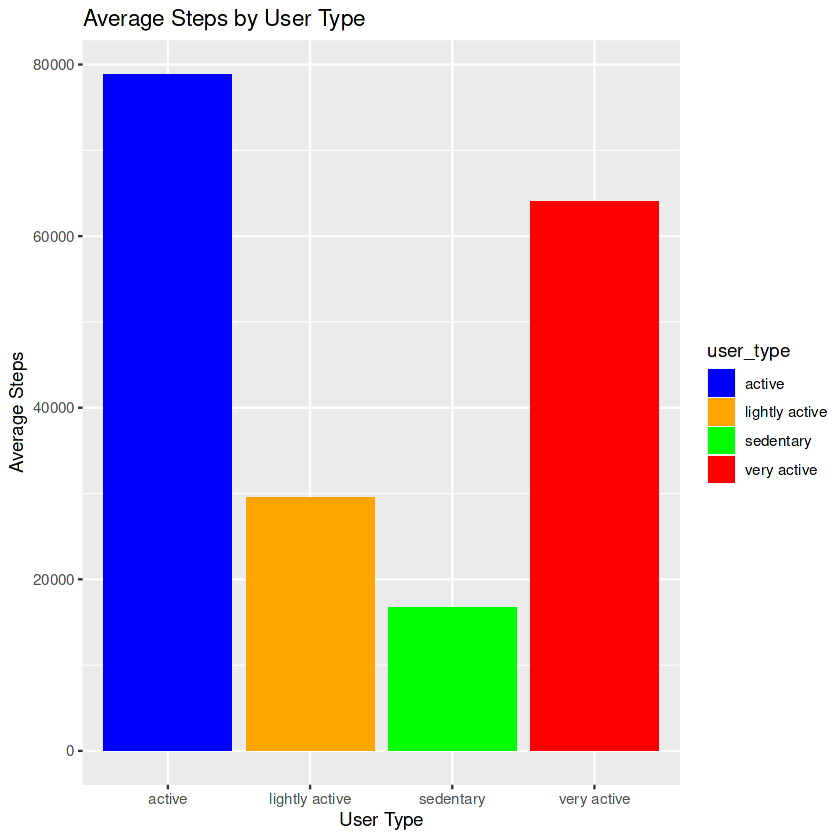

In [56]:


# Define custom colors for each user type
colors <- c("very active" = "red", "active" = "blue", "sedentary" = "green", "lightly active" = "orange")

# Create a bar plot of average steps by user type with custom colors
ggplot(user_type, aes(x = user_type, y = average_steps, fill = user_type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = colors) +
  labs(x = "User Type", y = "Average Steps", title = "Average Steps by User Type")



- The visualization shows the relationship between sleep quality and activity level based on user types. It reveals that users with better sleep quality tend to have higher activity levels.

**steps walked vs calories burn**

`geom_smooth()` using formula = 'y ~ x'


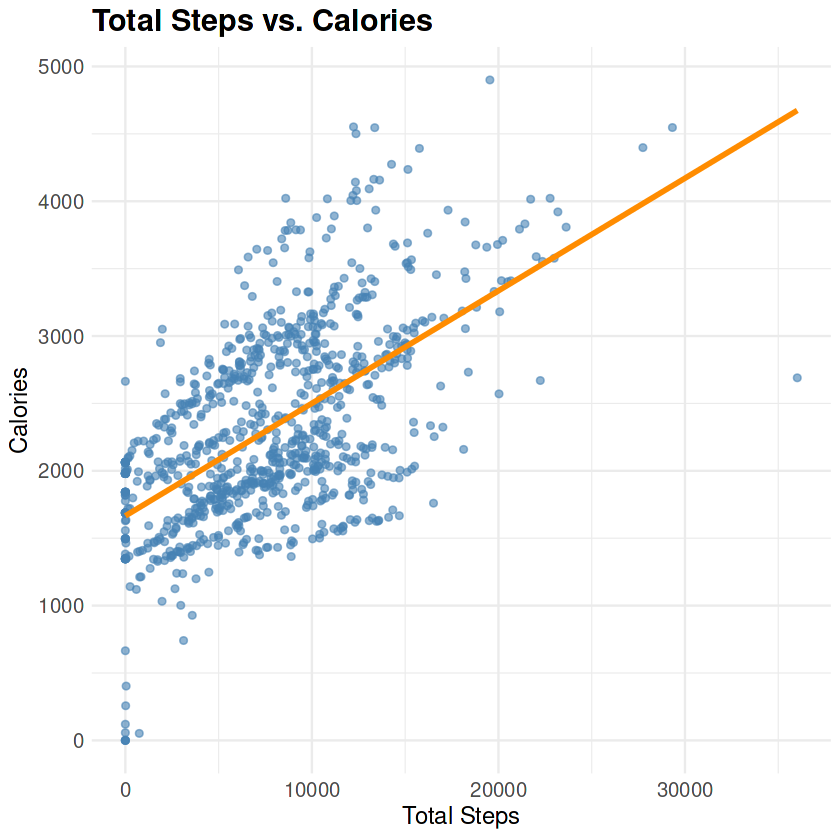

In [59]:

library(ggplot2)

ggplot(data = activity, aes(x = totalsteps, y = calories)) +
  geom_point(color = "steelblue", alpha = 0.6) +
  geom_smooth(method = "lm", color = "darkorange", se = FALSE, size = 1.2) +
  labs(title = "Total Steps vs. Calories", x = "Total Steps", y = "Calories") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))


**The graph shows that there is a positive correlation between the number of steps taken and the calories burned. As the total steps increase, the calories burned also tend to increase. This suggests that higher levels of physical activity result in greater calorie expenditure.**

**Realtionship between sleep quality and activity level**

 we can create a visualization to explore the relationship between sleep quality and activity level using the sleep dataset and user_type dataset.

One way to visualize this relationship is by creating a scatter plot where the x-axis represents the average sleep duration and the y-axis represents the average 

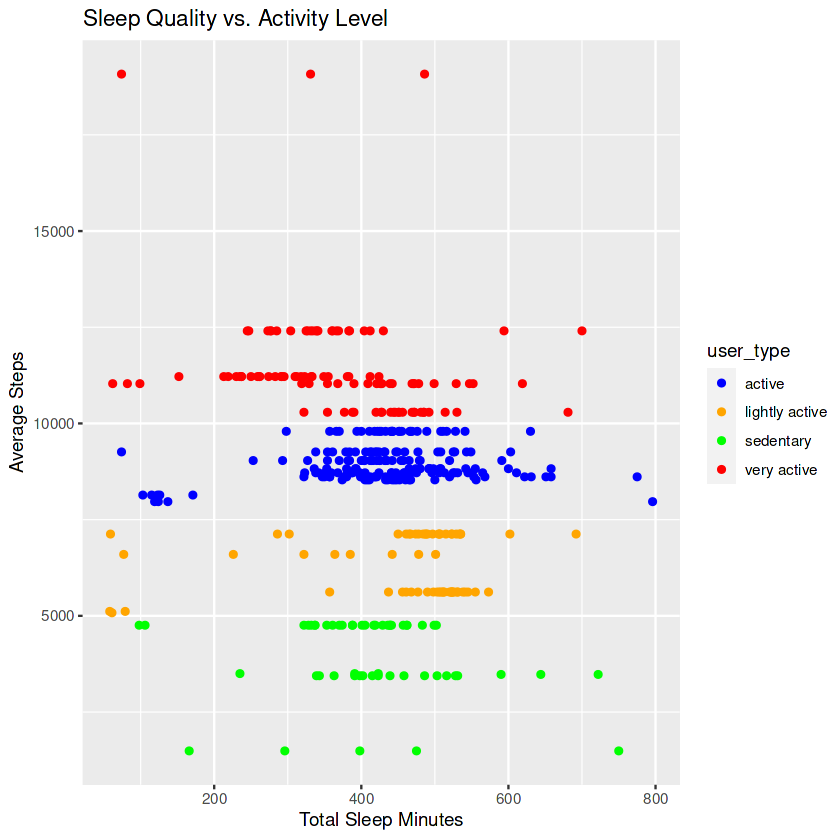

In [62]:
# Merge sleep dataset with user_type dataset
merged_data <- merge(sleep, user_type, by = "id")

# Create a scatter plot with color-coded data points
ggplot(data = merged_data, aes(x = totalminutesasleep, y = average_steps, color = user_type)) +
  geom_point() +
  labs(x = "Total Sleep Minutes", y = "Average Steps", title = "Sleep Quality vs. Activity Level") +
  scale_color_manual(values = c("very active" = "red", "active" = "blue", "sedentary" = "green", "lightly active" = "orange"))

### Conclusion:

1. Summary of Key Findings and Implications:
   - The analysis revealed a strong positive relationship between sleep quality and activity level. Users with better sleep quality tended to have higher activity levels.
   - Additionally, the analysis showed that the number of steps walked was positively associated with the calories burned. As the number of steps increased, the calories burned also increased.
   - These findings have important implications for promoting a healthy lifestyle. Encouraging better sleep quality can potentially contribute to increased physical activity and improved overall health.

2. Future Opportunities and Next Steps:
   - Further exploration can be done to understand the specific factors influencing sleep quality and how they relate to activity levels. This could involve collecting additional data on sleep patterns, environmental factors, and lifestyle habits.
   - It would be beneficial to conduct a longitudinal study to observe the long-term effects of improved sleep quality on sustained physical activity levels and overall well-being.
   - The findings from this analysis can be used to develop targeted interventions and personalized recommendations for individuals to improve their sleep quality and increase their physical activity levels.
   - Additionally, incorporating other health metrics such as heart rate, stress levels, and dietary habits could provide a more comprehensive understanding of the relationship between sleep, activity, and overall health.

